Epoch [100/1000], Loss: 8.863572120666504
Epoch [200/1000], Loss: 3.0337231159210205
Epoch [300/1000], Loss: 1.4002468585968018
Epoch [400/1000], Loss: 0.9288220405578613
Epoch [500/1000], Loss: 0.779665470123291
Epoch [600/1000], Loss: 0.7203458547592163
Epoch [700/1000], Loss: 0.68651282787323
Epoch [800/1000], Loss: 0.6603354215621948
Epoch [900/1000], Loss: 0.6368577480316162
Epoch [1000/1000], Loss: 0.6146889328956604


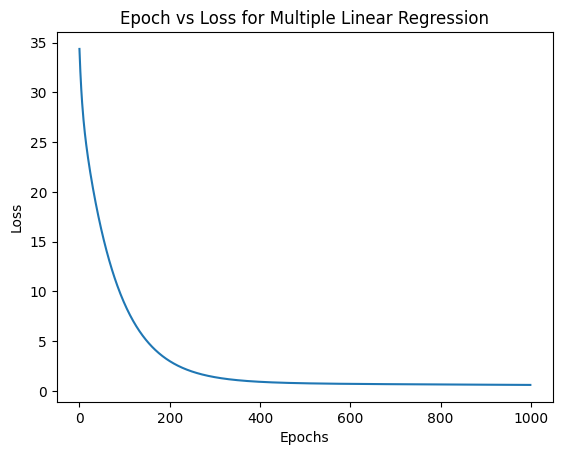

Final w1 (weight for X1): 2.71586012840271
Final w2 (weight for X2): -1.5401053428649902
Final b (bias): 0.1987287551164627
Prediction for X1 = 3, X2 = 2: 5.2660980224609375


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


class MultipleLinearRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleLinearRegressionModel, self).__init__()
        
        self.linear = nn.Linear(2, 1)  
    
    def forward(self, x):
        return self.linear(x)


x1 = torch.tensor([3.0, 4.0, 5.0, 6.0, 2.0]).view(-1, 1) 
x2 = torch.tensor([8.0, 5.0, 7.0, 3.0, 1.0]).view(-1, 1)  
y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).view(-1, 1) 


X = torch.cat((x1, x2), dim=1)

model = MultipleLinearRegressionModel()

criterion = nn.MSELoss()


optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 1000


losses = []


for epoch in range(epochs):
    
    y_pred = model(X)
    
   
    loss = criterion(y_pred, y)
    
  
    optimizer.zero_grad()
    loss.backward() 
    
    
    optimizer.step()
    
   
    losses.append(loss.item())
    
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")


plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss for Multiple Linear Regression')
plt.show()

final_w1 = model.linear.weight[0][0].item()  
final_w2 = model.linear.weight[0][1].item()  
final_b = model.linear.bias.item()  

print(f"Final w1 (weight for X1): {final_w1}")
print(f"Final w2 (weight for X2): {final_w2}")
print(f"Final b (bias): {final_b}")


X_test = torch.tensor([[3.0, 2.0]], dtype=torch.float32)
y_test_pred = model(X_test)

print(f"Prediction for X1 = 3, X2 = 2: {y_test_pred.item()}")
